Hough circles ipython notebook

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys
%matplotlib inline
from pylab import rcParams
import pymorph
rcParams['figure.figsize'] = 15, 15

In [2]:
""" Do some common imports """
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
from pylab import rcParams
from helpers import scaled_resize
rcParams['figure.figsize'] = 15, 15

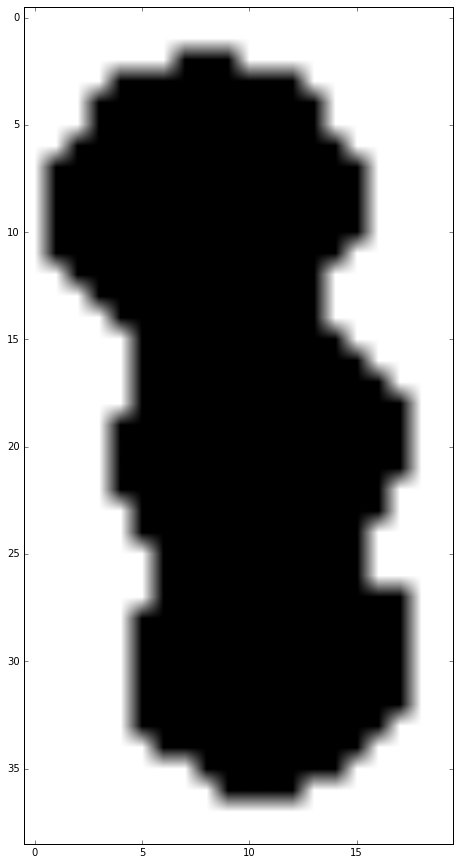

In [3]:
input_file = "/Users/shashwat/Downloads/watershed2.tiff"

img_gray = cv2.imread(input_file, 0)
img = cv2.imread(input_file)

plt.imshow(img_gray, cmap='gray')

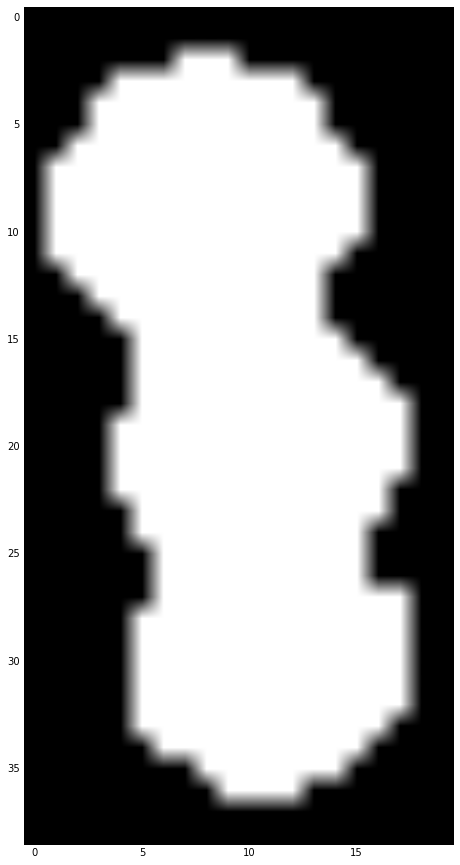

In [4]:
rng,img_gray = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(img_gray, cmap='gray')

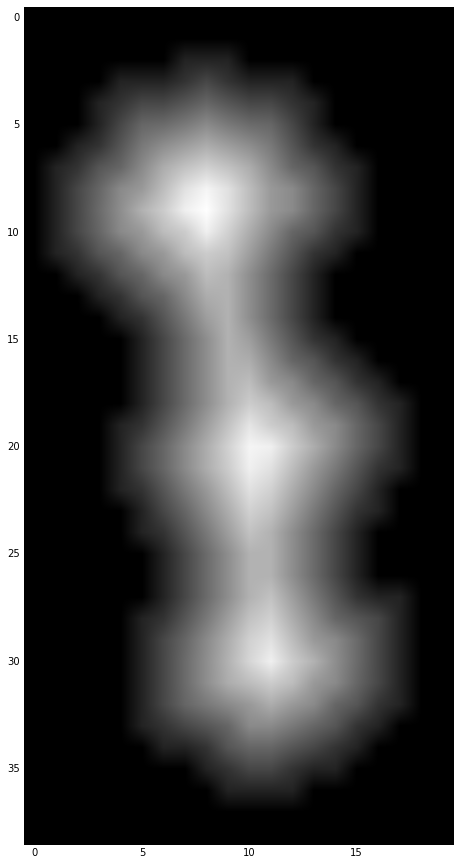

In [5]:
dist_transform = cv2.distanceTransform(img_gray,cv2.cv.CV_DIST_L2,3)
plt.imshow(dist_transform, cmap='gray')

In [6]:
dist_transform.shape

(39, 20)

In [7]:
zo = np.array([[1,1,1],[2,3.5,2],[3,3,3]])

In [8]:
def check(arr, x,y):
    val = max(arr[x][y], arr[x-1][y], arr[x+1][y], arr[x][y-1], arr[x][y+1], arr[x-1][y-1], arr[x-1][y+1], arr[x+1][y-1], arr[x+1][y+1])
    if val == arr[x][y]:
      return 1
    else:
      return 0

regs = np.zeros(dist_transform.shape)

for i in xrange(1, dist_transform.shape[0]-1):
    for j in xrange(1, dist_transform.shape[1]-1):
        regs[i][j] = check(dist_transform, i,j)

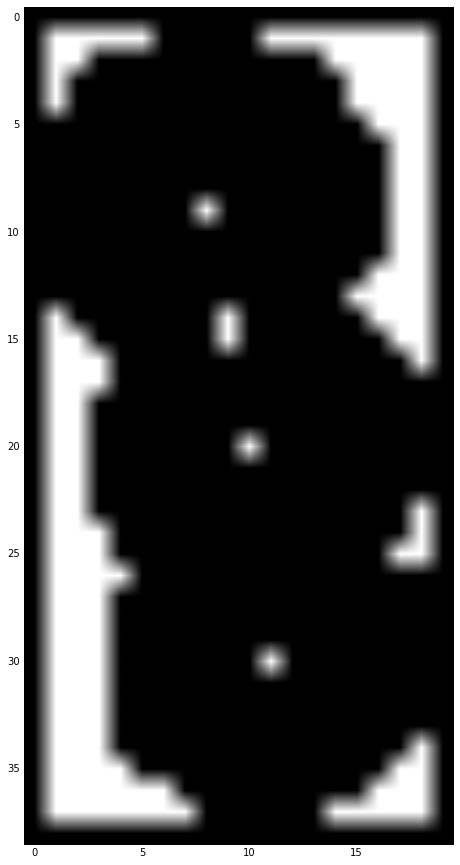

In [9]:
plt.imshow(regs, cmap='gray')

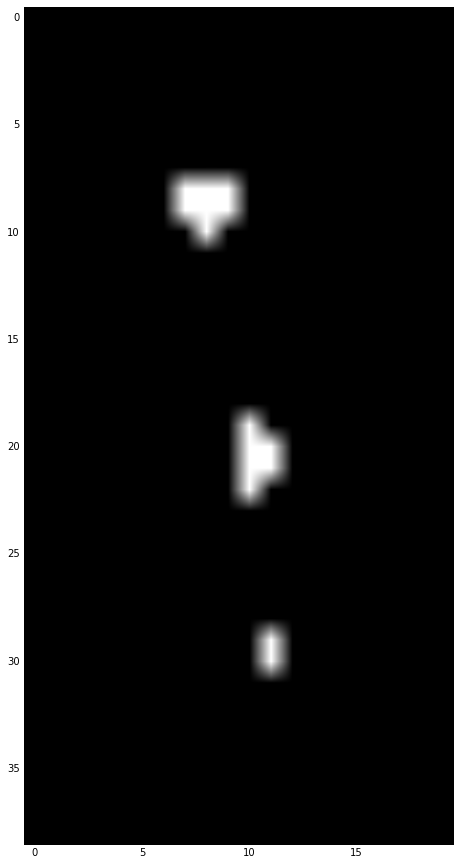

In [10]:
pimp = pymorph.regmax(dist_transform.astype('int')).astype(int)
plt.imshow(pimp, cmap='gray')

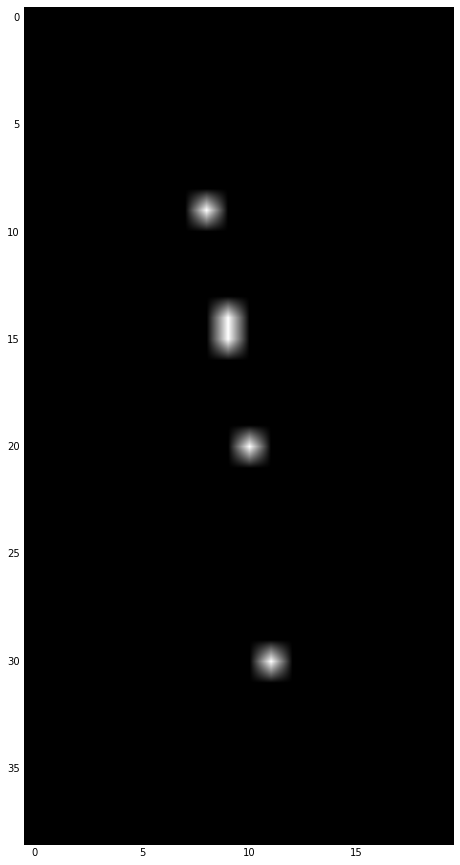

In [11]:
from skimage.feature import peak_local_max
popo = peak_local_max(dist_transform)

regs = np.zeros(dist_transform.shape)

for x,y in popo:
    regs[x,y] = 1
plt.imshow(regs, cmap='gray')

In [12]:
from custom import colony_count

In [13]:
print colony_count(img_gray)

3


In [15]:
cunts[0]

NameError: name 'cunts' is not defined